In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [161]:
df = pd.read_csv(r'C:\Users\zstat\Box Sync\WaterContamination\Data Analysis\Processed\Python\Dasymetric_Data.csv')

from IPython.display import display
with pd.option_context ('display.max_columns', None):
    display(df.head(5))

,PWS_ID,PWS_Name,County_Name,Ownership,Primary_Source,Population,Number_of_Facilities,Percent_Below_Poverty_Line,Percent_Minority,Percent_AfricanAmerican,Percent_Hispanic,Owner_Type,Service_Connections_Count,Urban_Rural,Violations_Not_HealthBased,Violations_Yes_HealthBased,All_Violations
0,1090001,AQUA PA BRISTOL,Bucks,Private Investor Owned,Surface water,28728,17,6.146905,31.443556,15.865342,10.494858,Private,9859,Urban,0,0,0
1,1090002,BUCKINGHAM VLY REHAB & NURSING CTR,Bucks,Institutional Health,Ground water,190,9,0.000000,0.000000,0.000000,0.000000,Private,1,Rural,12,4,16
2,1090005,AQUA PA CHALFONT,Bucks,Private Investor Owned,Ground water,5900,15,3.353057,8.415516,1.824458,2.679158,Private,2141,Urban,1,1,2
3,1090007,UMH ARBOR ESTATES,Bucks,Mobile Home Park,Ground water,920,10,2.419355,4.838710,0.000000,3.225806,Private,231,Urban,17,1,18
4,1090022,FALLS TWP AUTH,Bucks,Authority - (Purchases),Surface water purchased,24400,12,4.632000,18.746799,6.494111,4.999767,Local government,7634,Urban,2,2,4


In [9]:
#Define the variables I am going to use in my plots

all_vio = df.All_Violations
h_vio = df.Violations_Yes_HealthBased
perc_below_pov = df.Percent_Below_Poverty_Line
perc_non_white = df.Percent_Minority

Text(0.5,0.98,'SDWA Violations')

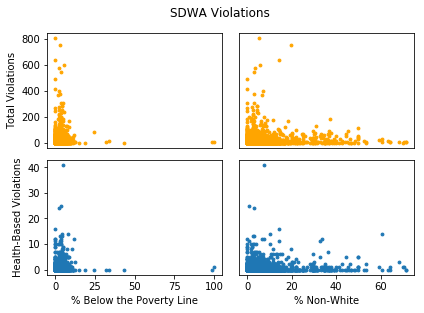

In [55]:
#creating a figure to show number of violations compared to percent below poverty line and percent minority

plt.figure(1)
plt.subplot(221)
plt.scatter(perc_below_pov, all_vio, color='orange', s=8)
plt.ylabel("Total Violations")
plt.xticks([])

plt.subplot(222)
plt.scatter(perc_non_white, all_vio, color='orange', s=8)
locs, labels = plt.xticks()
plt.xticks([])
plt.yticks([])

plt.subplot(223)
plt.scatter(perc_below_pov, h_vio, s=8)
plt.xlabel("% Below the Poverty Line")
plt.ylabel("Health-Based Violations")

plt.subplot(224)
plt.scatter(perc_non_white, h_vio, s=8)
plt.xlabel("% Non-White")
plt.yticks([])

plt.subplots_adjust(top=0.89, bottom=0.05, left=0.10, right=0.95, hspace=0.1,
                    wspace=0.1)
plt.suptitle("SDWA Violations")

Text(0.5,0.98,'SDWA Violations')

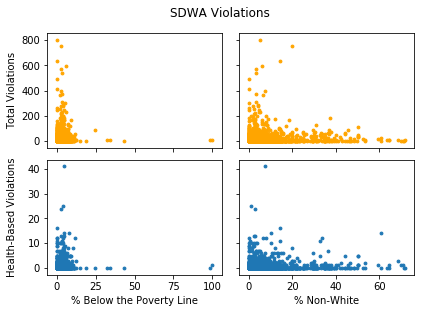

In [132]:
# creating the same plot as above but using axes
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')

# plot 1
ax1.scatter(perc_below_pov, all_vio, color='orange', s=8)
ax1.set_ylabel("Total Violations")

# plot 2
ax2.scatter(perc_non_white, all_vio, color='orange', s=8)

# plot 3
ax3.scatter(perc_below_pov, h_vio, s=8)
ax3.set_xlabel("% Below the Poverty Line")
ax3.yaxis.labelpad = 10
ax3.set_ylabel("Health-Based Violations")

# plot 4
ax4.scatter(perc_non_white, h_vio, s=8)
ax4.set_xlabel("% Non-White")

fig.subplots_adjust(top=0.89, bottom=0.05, left=0.10, right=0.95, hspace=0.1,
                    wspace=0.1)
fig.suptitle("SDWA Violations")

In [145]:
# create a bar graph with rural vs. urban data

# data to plot
mean_rural_all_vio = df[df.Urban_Rural=='Rural'].All_Violations.mean()
mean_urban_all_vio = df[df.Urban_Rural=='Urban'].All_Violations.mean()

mean_rural_h_vio = df[df.Urban_Rural=='Rural'].Violations_Yes_HealthBased.mean()
mean_urban_h_vio = df[df.Urban_Rural=='Urban'].Violations_Yes_HealthBased.mean()

print mean_urban_all_vio 

18.6989247312


In [86]:
df[df.Urban_Rural=='Rural'].head(5)

,PWS_ID,PWS_Name,County_Name,Ownership,Primary_Source,Population,Number_of_Facilities,Percent_Below_Poverty_Line,Percent_Minority,Percent_AfricanAmerican,Percent_Hispanic,Owner_Type,Service_Connections_Count,Urban_Rural,Violations_Not_HealthBased,Violations_Yes_HealthBased,All_Violations
1,1090002,BUCKINGHAM VLY REHAB & NURSING CTR,Bucks,Institutional Health,Ground water,190,9,0.000000,0.000000,0.000000,0.000000,Private,1,Rural,12,4,16
8,1090044,DURHAM QUARTERS APT,Bucks,Apartments,Ground water,25,3,0.000000,0.000000,0.000000,0.000000,Private,16,Rural,34,5,39
11,1090050,QUAKER VIEW MHP,Bucks,Mobile Home Park,Ground water,60,4,0.000000,7.407407,0.000000,3.703704,Private,20,Rural,2,0,2
13,1090053,CHERRY MHP,Bucks,Mobile Home Park,Ground water,62,6,0.000000,16.666667,0.000000,0.000000,Private,42,Rural,15,0,15
15,1090058,RIEGELSVILLE WATER CO,Bucks,Auth Leases Back To Mun,Ground water,980,15,3.680982,6.310254,0.175285,3.330412,Local government,402,Rural,22,0,22


Text(0.5,0.98,'SDWA Violations')

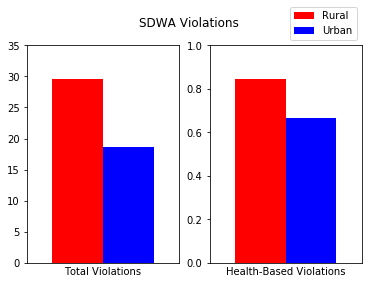

In [146]:
fig, (ax1, ax2) = plt.subplots(1, 2)

# set dimensions
index = np.arange(1)
bar_width = 1

# subplot 1
ax1.bar(index, mean_rural_all_vio, bar_width, color='r', label="Rural")
ax1.bar(index + bar_width, mean_urban_all_vio, bar_width, color='b', label="Urban")
ax1.set_ylim(0, 35)
ax1.set_xlim(-1, 2)
ax1.set_xticks([])
ax1.set_xlabel("Total Violations")
#ax1.legend()

# subplot 2
ax2.bar(index, mean_rural_h_vio, bar_width, color='r', label="Rural")
ax2.bar(index + bar_width, mean_urban_h_vio, bar_width, color='b', label="Urban")
ax2.set_ylim(0, 1)
ax2.set_xlim(-1, 2)
ax2.set_xticks([])
ax2.set_xlabel("Health-Based Violations")
ax2.legend(bbox_to_anchor=(1, 1.2))

fig.suptitle("SDWA Violations")

In [165]:
#Use the internal scipy function to conduct a two-tailed t-test

# Total Violations
a = df[df.Urban_Rural=='Rural'].All_Violations
b = df[df.Urban_Rural=='Urban'].All_Violations
## Cross Checking with the internal scipy function
t2, p2 = stats.ttest_ind(a,b)
print("t = " + str(t2))
print("p = " + str(2*p2))


t = 4.039454811788142
p = 0.00011179420015263244


In [167]:
# Health-Based Violations
a2 = df[df.Urban_Rural=='Rural'].Violations_Yes_HealthBased
b2 = df[df.Urban_Rural=='Urban'].Violations_Yes_HealthBased
## Cross Checking with the internal scipy function
t2, p2 = stats.ttest_ind(a2,b2)
print("t = " + str(t2))
print("p = " + str(2*p2))

t = 1.7405153325058795
p = 0.16388927825636918
